In [76]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

In [75]:
T=lambda x,y,P: P[0]+P[1]*x+P[2]*y+P[3]*x*y
x=sym.Symbol('x',Real=True)
y=sym.Symbol('y',Real=True)
a00=sym.Symbol('a00',Real=True)
a01=sym.Symbol('a01',Real=True)
a10=sym.Symbol('a10',Real=True)
a11=sym.Symbol('a11',Real=True)

matriz_A=np.array([[a00,a01],[a10,a11]])
respuesta=0
for i in range(2):
    for j in range(2):
        respuesta+=matriz_A[i][j]*x**i*y**j
respuesta


a00 + a01*y + a10*x + a11*x*y

In [77]:
position=np.zeros((4,2))
position[0]=np.array([1,1])
position[1]=np.array([-1,1])
position[2]=np.array([-1,-1])
position[3]=np.array([1,-1])
print(position)


[[ 1.  1.]
 [-1.  1.]
 [-1. -1.]
 [ 1. -1.]]


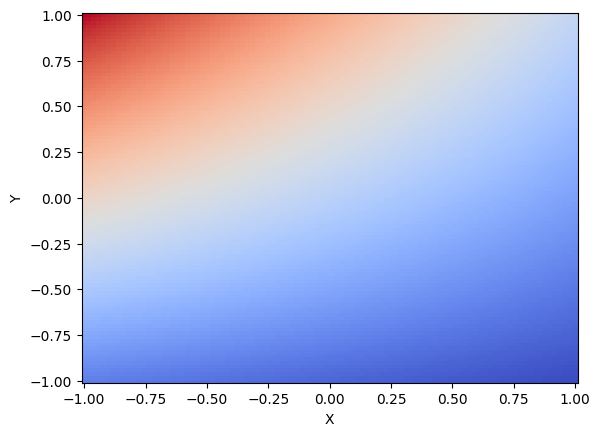

1.225


In [79]:
temp=np.array([1,2,0.5,0.3])

def interpolacion(vertices):
    matriz=np.zeros([4,4])
    for i in range(len(vertices)):
        matriz[i]=np.array([1,vertices[i][0],vertices[i][1],vertices[i][0]*vertices[i][1]])
    return(np.linalg.solve(matriz,temp.T))
coef=interpolacion(position)

X=np.linspace(-1,1,100)
Y=np.linspace(-1,1,100)
X,Y=np.meshgrid(X,Y)
Z=X.copy()

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i,j]=T(X[i,j],Y[i,j],coef)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.pcolor(X,Y,Z,cmap='coolwarm')
ax.set_xlabel('X')
ax.set_ylabel("Y")
plt.show()
print(T(0,0.5,coef))

In [80]:

def rotacion(posicion,angulo):
    matriz=np.zeros([2,2])
    matriz[0]=np.array([np.cos(angulo),np.sin(-angulo)])
    matriz[1]=np.array([np.sin(angulo),np.cos(angulo)])
    nueva_pos=np.dot(matriz,posicion)
    return(nueva_pos)

def rotacion_angulo(position,angulo):
    nueva_pos=np.zeros([4,2])
    for i in range(len(position)):
        nueva_pos[i]=rotacion(position[i],angulo)
    return(nueva_pos)

nuevos_coef=(interpolacion(rotacion_angulo(position,np.pi)))
temperatura_rotacion_pi=T(0,0.5,nuevos_coef)
print("La temperatura en K para [0,0,5] con una rotacion de pi radianes es: ",temperatura_rotacion_pi)

La temperatura en K para [0,0,5] con una rotacion de pi radianes es:  0.6749999999999999


In [81]:
tetha=np.linspace(0,2*np.pi,200)
matriz_solucion=np.stack((tetha.T,np.zeros(len(tetha)).T),axis=-1)
for m in range(len(tetha)):
    matriz_solucion[m,1]=T(0,0.5,interpolacion(rotacion_angulo(position,tetha[m])))
minimo=(np.argmin(matriz_solucion[:,1]))
valor_minimo=(matriz_solucion[minimo])
print(f'El angulo para el cual la temperatura es minima es para {valor_minimo[0]} con una temperatura de {valor_minimo[1]}K')



El angulo para el cual la temperatura es minima es para 2.652198823131082 con una temperatura de 0.6367664129532491K
